# Pattern detection

In this article it is explained the chessboard pattern and how it is detected. The pattern is used in the calibration processes.

## Chessboard pattern

In [49]:
# Pattern parameters
#rows = 6
#columns = 11
#square_width = 13
rows, columns, square_width = 7, 9, 22

In [50]:
import cv2

impath = "/home/isaias/Pictures/checkerboard/image11.jpg"
# Load image
#image = cv2.imread('images/4.2. Camera calibration/captures/frame0.jpg')
image = cv2.cvtColor(cv2.imread(impath), cv2.COLOR_BGR2RGB)

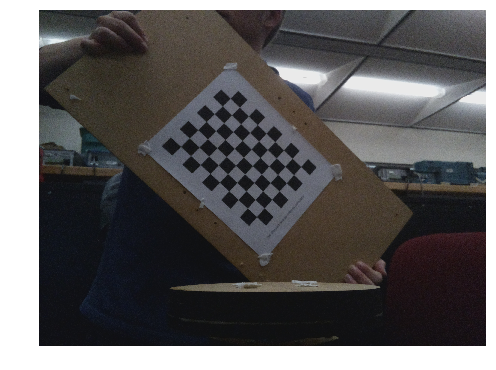

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_image(image):
    f, axarr = plt.subplots(1, 1, figsize=(8,8))
    axarr.axis('off')
    axarr.imshow(image)
    axarr.plot()

plot_image(image)

## Corners detection

### Find corners

In [52]:
# Load image
image = cv2.imread(impath)
# Convert image to 1 channel
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Find the chess board corners
ret, corners = cv2.findChessboardCorners(gray, (columns, rows), flags=cv2.CALIB_CB_FAST_CHECK)

### Subpixel accuracy

In [53]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Find corners with subpixel accuracy
cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)

array([[[ 1405.24121094,   650.11004639]],

       [[ 1472.51293945,   715.44390869]],

       [[ 1538.73498535,   779.95916748]],

       [[ 1604.44165039,   843.8225708 ]],

       [[ 1669.1484375 ,   906.5335083 ]],

       [[ 1733.24865723,   968.16003418]],

       [[ 1796.6920166 ,  1029.65893555]],

       [[ 1860.12487793,  1090.12426758]],

       [[ 1922.9309082 ,  1151.1619873 ]],

       [[ 1347.45385742,   706.253479  ]],

       [[ 1415.61608887,   772.61981201]],

       [[ 1482.83251953,   837.47235107]],

       [[ 1548.71154785,   901.34936523]],

       [[ 1614.62512207,   964.40209961]],

       [[ 1678.99926758,  1026.35961914]],

       [[ 1743.53271484,  1087.87585449]],

       [[ 1807.74108887,  1149.19152832]],

       [[ 1871.22851562,  1209.91894531]],

       [[ 1288.4564209 ,   763.98052979]],

       [[ 1357.96118164,   830.12750244]],

       [[ 1426.06567383,   895.43377686]],

       [[ 1492.28552246,   959.51153564]],

       [[ 1558.86096191,  1022.9

### Draw corners

In [54]:
# Draw corners into image
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2.drawChessboardCorners(image, (columns, rows), corners, ret)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

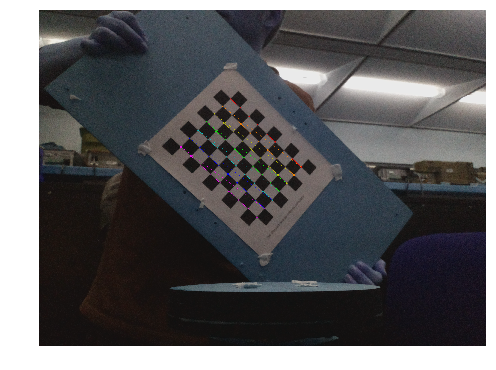

In [55]:
# Show image
plot_image(image)

## Pose detection
Pose refers to the coordinate system of the pattern. It is represented by a Rotation matrix and a Traslation vector. In order to determine this values Camera intrinsics parameters are needed. Those values are obtained in [Camera calibration](http://nbviewer.ipython.org/github/Jesus89/3DScanScience/blob/master/notebooks/4.2.%20Camera%20calibration.ipynb).


![](http://nbviewer.ipython.org/github/Jesus89/3DScanScience/blob/master/notebooks/images/4.1.%20Pattern%20detection/pattern_pose.png)

In [56]:
import numpy as np

# Compute object points
objp = np.zeros((rows * columns, 3), np.float32)
objp[:, :2] = np.mgrid[0:columns, 0:rows].T.reshape(-1, 2)
objp *= square_width

camera_matrix = np.array(
[[  3.24171244e+03,   0.00000000e+00,   1.06029763e+03],
 [  0.00000000e+00,   3.25977353e+03,   1.94331846e+03],
 [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

distortion_coefficients = np.array([0.47016272, 0.398826, 0.08195973, -0.05850632, -0.67014709])
print(camera_matrix)
print(distortion_coefficients)

[[  3.24171244e+03   0.00000000e+00   1.06029763e+03]
 [  0.00000000e+00   3.25977353e+03   1.94331846e+03]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
[ 0.47016272  0.398826    0.08195973 -0.05850632 -0.67014709]


In [57]:
# Camera calibration results
#camera_matrix = np.array([[1430, 0, 480],[0, 1430, 640],[0, 0, 1]])
#distortion_coefficients = np.array([0.0, 0.0, 0.0, 0.0, 0.0])

# Compute pose
ret, rvecs, tvecs = cv2.solvePnP(objp, corners, camera_matrix, distortion_coefficients)

if ret:
    R = cv2.Rodrigues(rvecs)[0]
    t = tvecs.T[0]
    n = R.T[2]
    d = np.dot(n, t)
    print("\nRotation matrix\n\n{0}\n".format(R))
    print("\nTranslation vector\n\n{0} mm\n".format(t))
    print("\nPlane normal\n\n{0}\n".format(n))
    print("\nPlane distance\n\n{0} mm\n".format(d))


Rotation matrix

[[ 0.73179524 -0.66523821 -0.14810081]
 [ 0.68136415  0.71885406  0.13781052]
 [ 0.01478604 -0.20175967  0.97932345]]


Translation vector

[  89.74128712 -319.75659693  783.30160716] mm


Plane normal

[-0.14810081  0.13781052  0.97932345]


Plane distance

709.7490479530222 mm



# References
* http://docs.opencv.org/doc/tutorials/calib3d/camera_calibration/camera_calibration.html